# <font color = "blue"> Bike Sharing Assignment </font>

###  <font color = "orange"> By Sravan Sreereddy </font>

# <font color = "blue"> Business Understanding </font><br>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br>
<br>
Which variables are significant in predicting the demand for shared bikes.<br>
<br>
How well those variables describe the bike demands<br>




## Data Understanding

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required librarys
import pandas as pd
import numpy as np
#Importing Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
#Importing dataset
count = pd.read_csv("day.csv")
# Check the head of the dataset
count.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
count.shape

(730, 16)

In [6]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Intuitions:
1.There are no Null values in the dataframe<br>
2.Its' observed that instant,dteday which stands as unique values will not be any help in analysis<br>
3.Casual and Registered will resulted with repect to count which are also not useful<br>
4.Dataset has 730 rows and 16 columns.<br>
5.Except one column, all other are either float or integer type.<br>
6.One column is date type.<br>
7.Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.<br>
8.We will analyse and finalize whether to convert them to categorical or treat as integer.<br>

## Data Cleaning

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:<br>
instant : Its only an index value<br>
dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.<br>
casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.<br>

We will save the new dataframe as bike, so that the original dataset is preserved for any future analysis/validation

In [7]:
# dropping the columns which are not useful for analysis
bike = count.drop(["instant","dteday","casual","registered"],axis=1)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


### Univariant analysis

Text(0.5, 0.98, 'Target Variable')

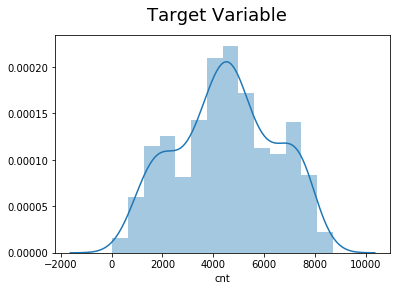

In [9]:
# Plot the histogram of the CNT -Targeted variable terms
fig = plt.figure()
sns.distplot(bike.cnt)
fig.suptitle('Target Variable',fontsize=18)


#### Intuition 2:
##### There are no outliers in the distribution
##### At count  3000 and 6000 there some errors

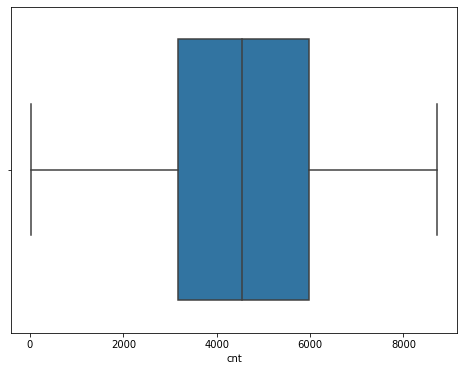

In [10]:
# Box plot to know the outliers in the data
plt.figure(figsize = (8,6))
sns.boxplot(x=bike.cnt)

In [11]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,4508.01
std,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,1936.01
min,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,22.00
25%,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,3169.75
50%,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,4548.50
75%,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,5966.00
max,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,8714.00


### Univariant Analysis on the Categorical Variables

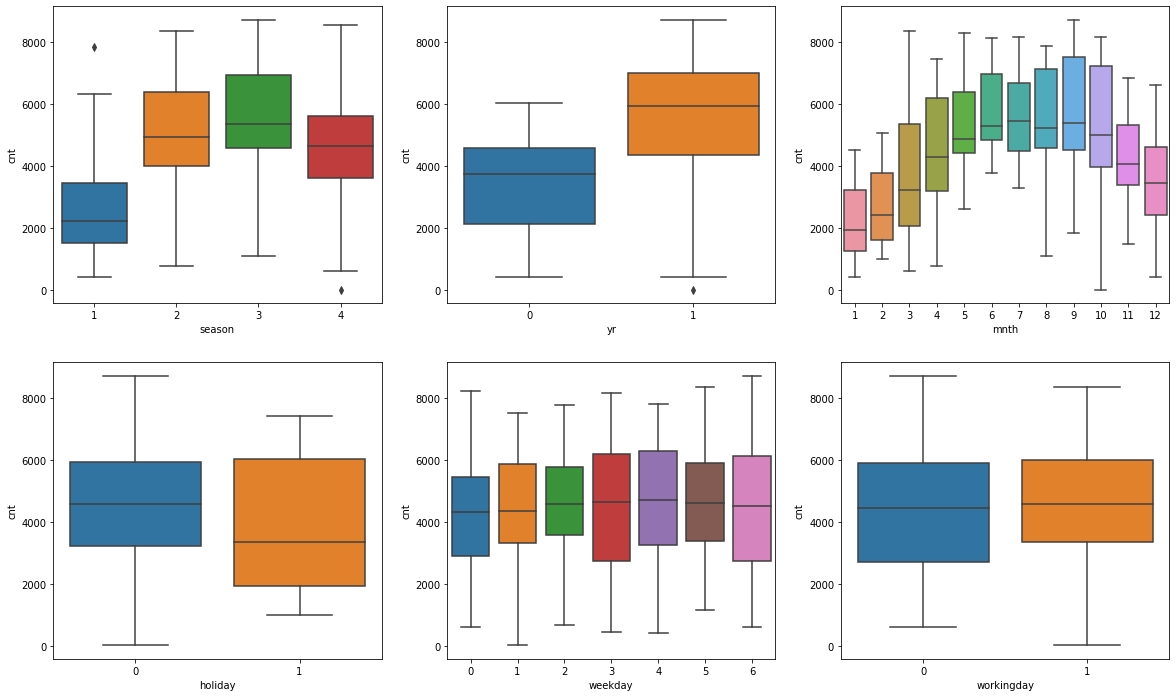

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data= bike)
plt.subplot(2,3,2)
sns.boxplot(x="yr",y="cnt",data= bike)
plt.subplot(2,3,3)
sns.boxplot(x="mnth",y="cnt",data= bike)
plt.subplot(2,3,4)
sns.boxplot(x="holiday",y="cnt",data= bike)
plt.subplot(2,3,5)
sns.boxplot(x="weekday",y="cnt",data= bike)
plt.subplot(2,3,6)
sns.boxplot(x="workingday",y="cnt",data= bike)
plt.show()

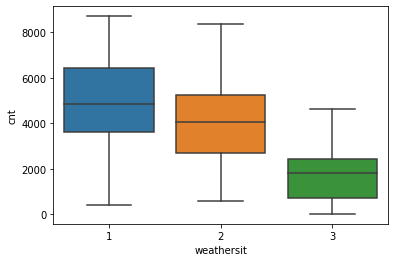

In [13]:
sns.boxplot(x="weathersit",y="cnt",data= bike)

Intuitions:
There were 7 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

In [14]:
bike.values

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.0583300e+01,
        1.0749882e+01, 9.8500000e+02],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.9608700e+01,
        1.6652113e+01, 8.0100000e+02],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 4.3727300e+01,
        1.6636703e+01, 1.3490000e+03],
       ...,
       [1.0000000e+00, 1.0000000e+00, 1.2000000e+01, ..., 7.5291700e+01,
        8.3336610e+00, 1.3410000e+03],
       [1.0000000e+00, 1.0000000e+00, 1.2000000e+01, ..., 4.8333300e+01,
        2.3500518e+01, 1.7960000e+03],
       [1.0000000e+00, 1.0000000e+00, 1.2000000e+01, ..., 5.7750000e+01,
        1.0374682e+01, 2.7290000e+03]])

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Univariant Analysis on the Continuous variables

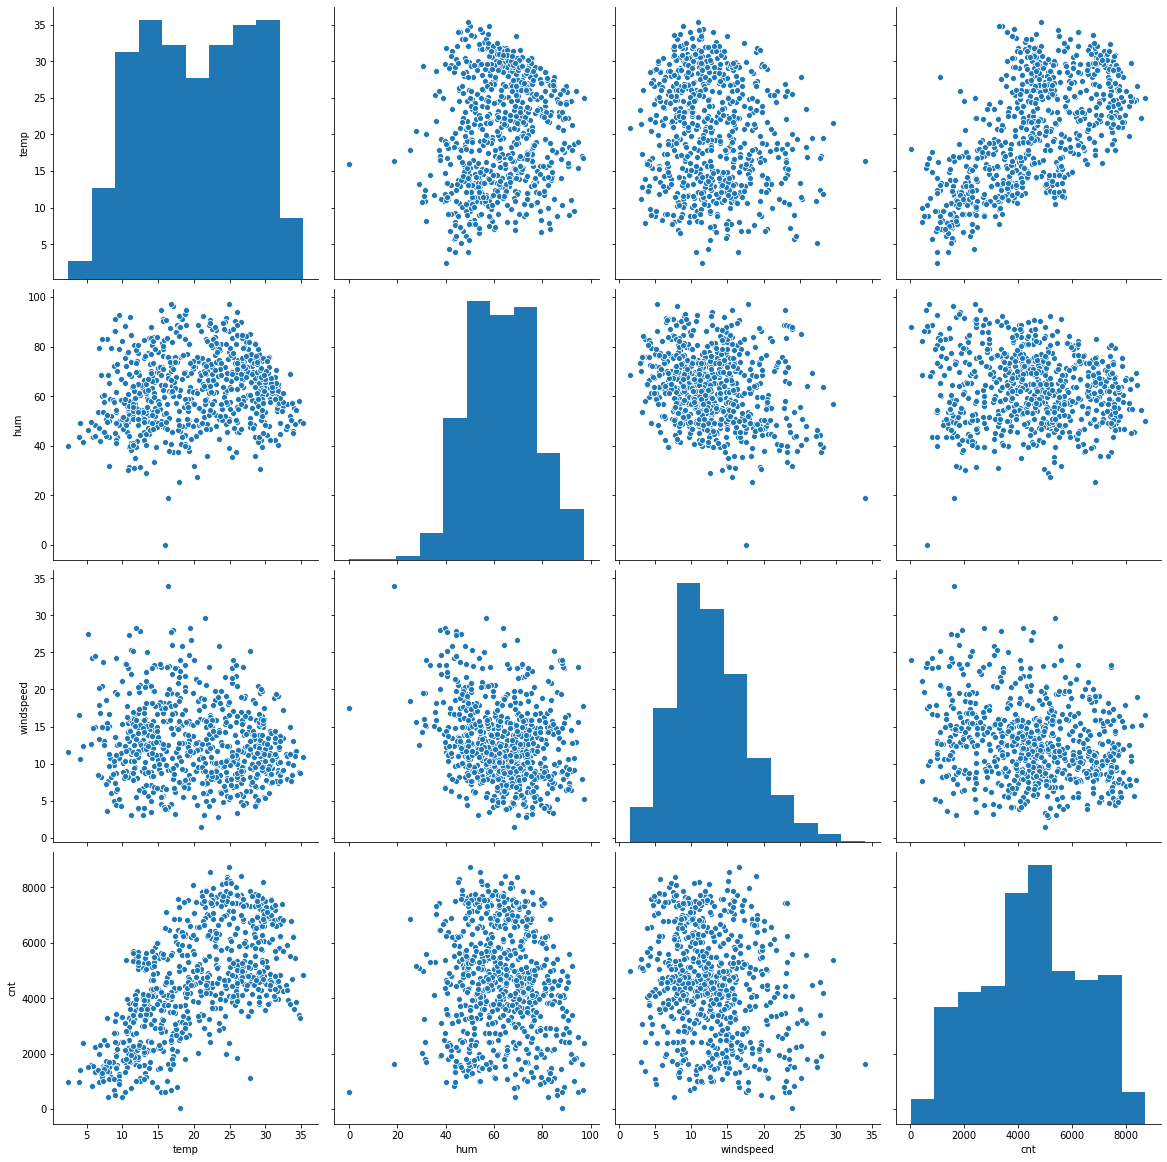

In [70]:
rid = sns.pairplot(data= bike,vars = ['temp', 'hum', 'windspeed','cnt'], size = 4)

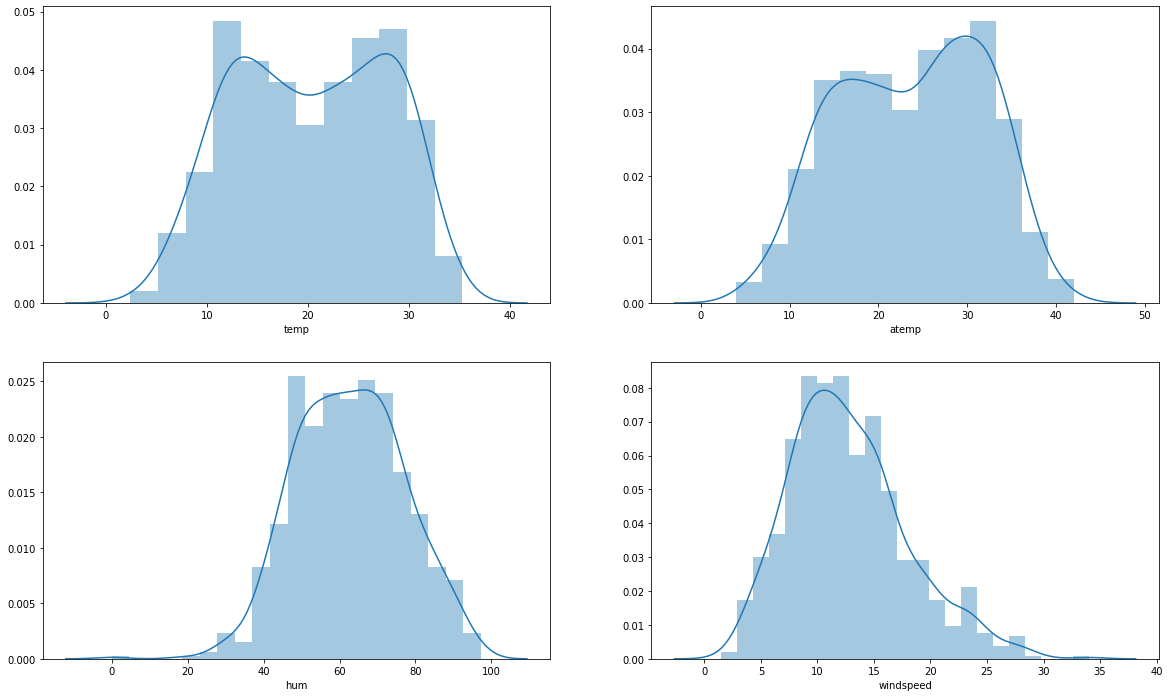

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.distplot(bike['temp'])
plt.subplot(2,2,2)
sns.distplot(bike['atemp'])
plt.subplot(2,2,3)
sns.distplot(bike['hum'])
plt.subplot(2,2,4)
sns.distplot(bike['windspeed'])

plt.show()

### Intuition:<br>
1.temp and a temp are having errors to obtain normal distribution<br>
2.humidity and windspeed are following normal distribution

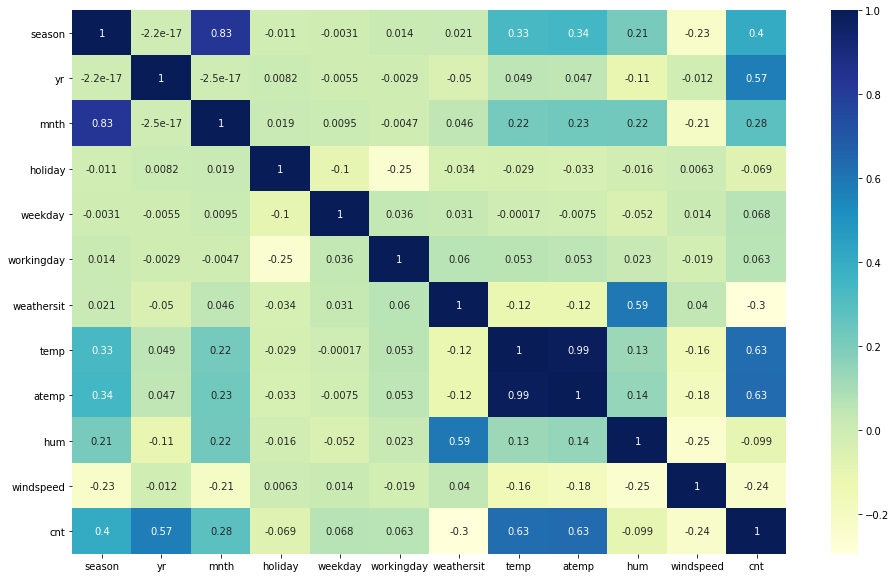

In [17]:
plt.figure(figsize = (16,10))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")
plt.show()

Intuitions:<br>
1.The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp'  with a pearson coeffient = 0.99 <br>
2.The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

In [18]:
bike= bike.drop('atemp',1)

## Data preparation

In [19]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,62.77,12.76,4508.01
std,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,14.24,5.20,1936.01
min,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,0.00,1.50,22.00
25%,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,52.00,9.04,3169.75
50%,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,62.62,12.13,4548.50
75%,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,72.99,15.63,5966.00
max,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,97.25,34.00,8714.00


In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [21]:
#Convert to category data type
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


### Creation of Dummy variables

In [23]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [24]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.11,80.58,10.75,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,43.73,16.64,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
bike.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [27]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.50,0.02,0.68,20.22,62.31,12.76,4499.63,0.25,0.26,0.24,0.08,0.08,0.08,0.09,0.07,0.08,0.10,0.08,0.08,0.09,0.08,0.14,0.14,0.15,0.13,0.15,0.15,0.34,0.03
std,0.50,0.15,0.47,7.50,14.41,5.21,1949.45,0.43,0.44,0.43,0.28,0.27,0.28,0.29,0.26,0.27,0.30,0.28,0.28,0.28,0.27,0.35,0.35,0.36,0.34,0.35,0.36,0.47,0.16
min,0.00,0.00,0.00,2.42,0.00,1.50,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,13.72,51.60,9.00,3146.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,20.21,62.21,12.08,4510.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,26.79,72.95,15.61,5983.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,35.33,96.25,34.00,8714.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [28]:
bike_train.shape

(510, 29)

In [29]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.49,0.04,0.68,20.56,63.77,12.77,4532.18,0.26,0.25,0.25,0.06,0.10,0.08,0.07,0.11,0.10,0.05,0.08,0.09,0.07,0.11,0.16,0.15,0.12,0.17,0.13,0.13,0.32,0.04
std,0.50,0.20,0.47,7.55,13.82,5.19,1911.83,0.44,0.43,0.43,0.24,0.30,0.27,0.25,0.31,0.30,0.23,0.28,0.28,0.26,0.31,0.36,0.35,0.32,0.38,0.34,0.33,0.47,0.19
min,0.00,0.00,0.00,3.96,29.00,3.88,506.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,14.15,53.23,9.06,3192.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,20.77,63.75,12.17,4592.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,27.15,73.38,15.66,5905.50,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,34.82,97.25,28.29,8395.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [30]:
bike_test.shape

(219, 29)

## Rescaling the Features 

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.79,58.71,7.83,6304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.13,49.46,9.79,7109,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.64,55.08,10.50,4266,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.86,83.88,6.75,3786,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.67,43.42,24.25,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [35]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.50,0.61,0.19,0.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.42,0.51,0.26,0.82,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.89,0.57,0.28,0.49,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.38,0.87,0.16,0.43,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.10,0.45,0.70,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.50,0.02,0.68,0.54,0.65,0.35,0.52,0.25,0.26,0.24,0.08,0.08,0.08,0.09,0.07,0.08,0.10,0.08,0.08,0.09,0.08,0.14,0.14,0.15,0.13,0.15,0.15,0.34,0.03
std,0.50,0.15,0.47,0.23,0.15,0.16,0.22,0.43,0.44,0.43,0.28,0.27,0.28,0.29,0.26,0.27,0.30,0.28,0.28,0.28,0.27,0.35,0.35,0.36,0.34,0.35,0.36,0.47,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.54,0.23,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.65,0.33,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,0.76,0.43,0.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


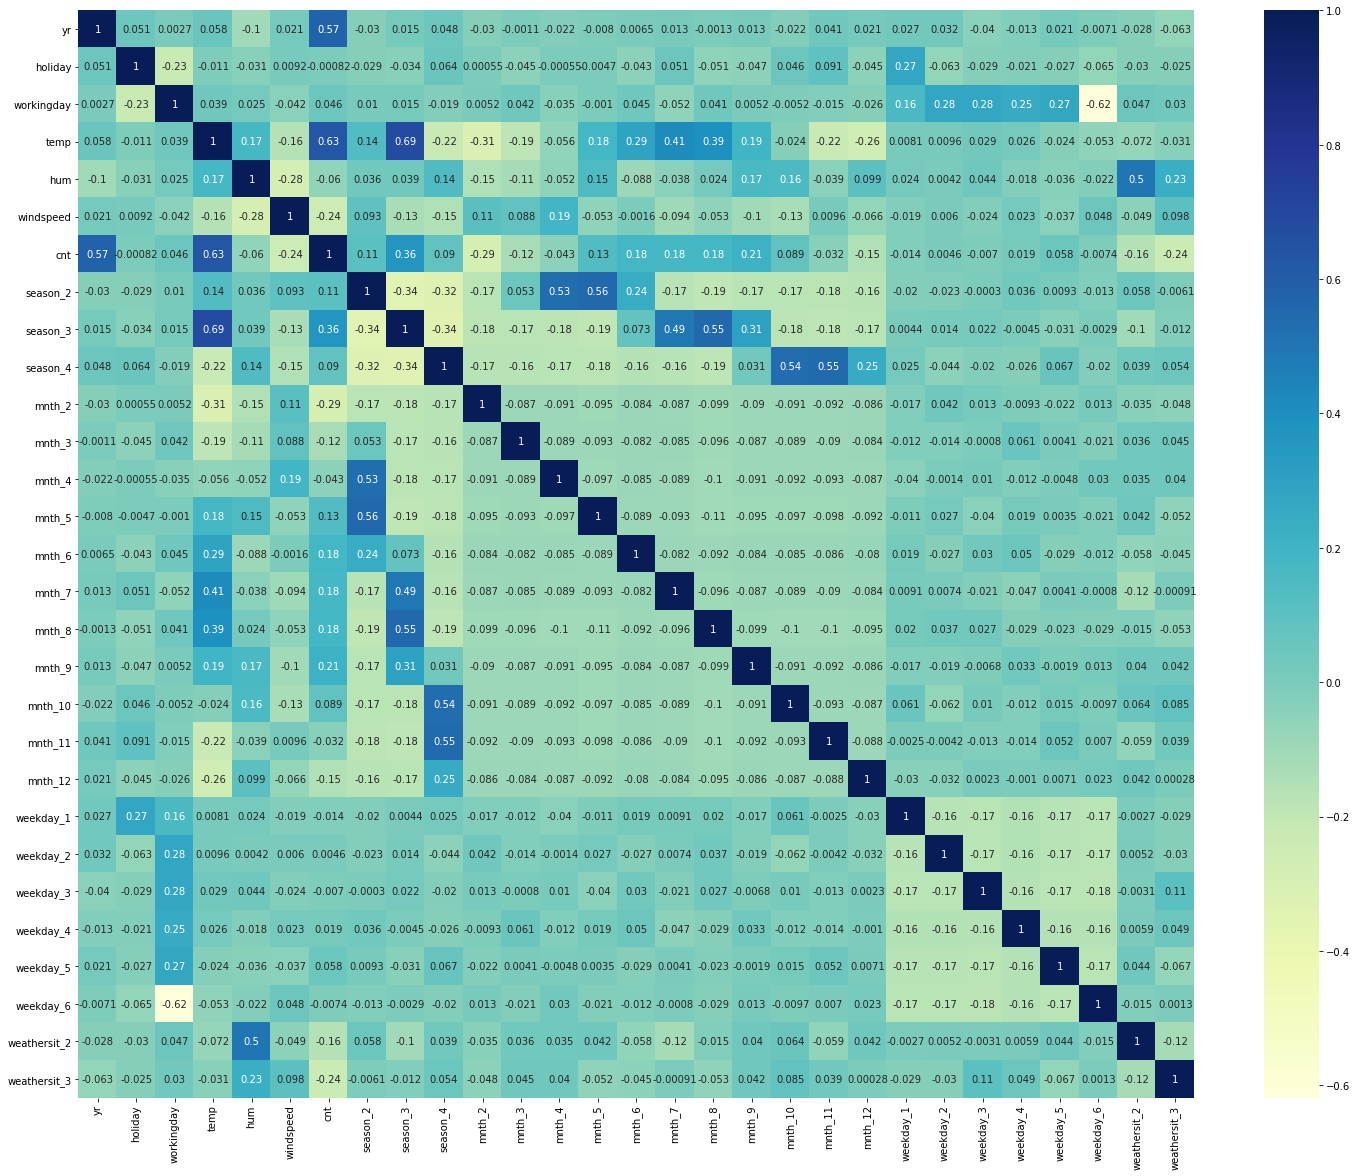

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Intuitions:<br>
It seems temp,cnt are  correlated

## Building a Linear Model

### Dividing into Target and Predictor Variables

In [38]:
y_train = bike_train.pop('cnt')
X_train = bike_train

RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 18),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 2),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', False, 8),
 ('mnth_7', False, 16),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 19),
 ('weekday_1', False, 10),
 ('weekday_2', False, 17),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_9', 'mnth_10', 'weathersit_3'], dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2'], dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

### Model-1

In [45]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [46]:
lr1.params

const           0.29
yr              0.23
temp            0.51
hum            -0.28
windspeed      -0.21
season_2        0.12
season_3        0.07
season_4        0.14
mnth_9          0.10
mnth_10         0.05
weathersit_3   -0.22
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.62e-183
Time:                        19:25:49   Log-Likelihood:                 487.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     499   BIC:                            -907.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2879      0.027     10.691   

In [49]:
X_train_new =  X_train_rfe.drop(["season_3"], axis = 1)

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.11
1,temp,7.12
3,windspeed,4.13
5,season_4,2.16
0,yr,2.00
7,mnth_10,1.62
4,season_2,1.58
6,mnth_9,1.23
8,weathersit_3,1.08


In [51]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params

const           0.28
yr              0.23
temp            0.60
hum            -0.29
windspeed      -0.21
season_2        0.09
season_4        0.12
mnth_9          0.11
mnth_10         0.04
weathersit_3   -0.21
dtype: float64

In [52]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     261.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.16e-182
Time:                        19:25:50   Log-Likelihood:                 483.07
No. Observations:                 510   AIC:                            -946.1
Df Residuals:                     500   BIC:                            -903.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2792      0.027     10.335   

Intuitions:<br>
Removing the variable 'hum' based on its Very High 'VIF' value.<br>
Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

## Model 3

In [53]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.37
0,yr,1.99
4,season_4,1.89
6,mnth_10,1.62
3,season_2,1.54
5,mnth_9,1.22
7,weathersit_3,1.06


In [55]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const           0.09
yr              0.23
temp            0.57
windspeed      -0.14
season_2        0.07
season_4        0.11
mnth_9          0.09
mnth_10         0.03
weathersit_3   -0.28
dtype: float64

In [56]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.10e-167
Time:                        19:25:50   Log-Likelihood:                 444.28
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     501   BIC:                            -832.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0901      0.018      4.870   

Intuitions:<br>
Removing the variable 'mnth_10' based on its Very High 'VIF' value.<br>


In [57]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.80
2,windspeed,3.34
0,yr,1.98
3,season_2,1.53
4,season_4,1.32
5,mnth_9,1.19
6,weathersit_3,1.05


#### Intuitions:<br>
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 4

In [59]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params

const           0.09
yr              0.23
temp            0.58
windspeed      -0.15
season_2        0.07
season_4        0.12
mnth_9          0.09
weathersit_3   -0.28
dtype: float64

In [60]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          4.21e-168
Time:                        19:25:51   Log-Likelihood:                 443.01
No. Observations:                 510   AIC:                            -870.0
Df Residuals:                     502   BIC:                            -836.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0890      0.019      4.807   

Intuitions<br>
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Insights:<br>
#### Hypothesis Testing: <br>
Hypothesis testing states that:<br>

 Null Hypotesis H0:B1=B2=...=Bn=0 <br>
Alternate Hypotesis H1: at least one Bi!=0<br>
From the lr4 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

### The equation of best fitted surface based on model lr4:

cnt = 0.0890 + (0.2329xyr)  + (0.5766xtemp) − (0.1456xwindspeed) + (0.0737xseason_2) + (0.1222xseason_4) + (0.0865xmnth_9 × )  − ( 0.2753xweathersit_3)

Interpretation of Coefficients:
temp: A coefficient value indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5766 units.

weathersit_3: A coefficient value  indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.2753 units.

yr: A coefficient value  indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2329 units.

season_4: A coefficient value  indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1222 units.

windspeed: A coefficient value indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1456 units.

season_2: A coefficient value of indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0737 units.

mnth_9: A coefficient value indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.0865 units.

const: The Constant value of ‘0.0890’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.0890 units.

## Residual Analysis of the train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

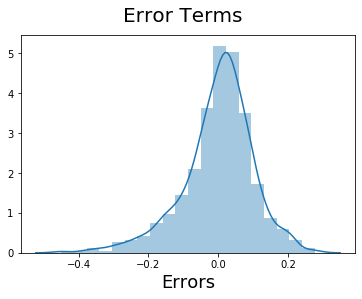

In [62]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Intutions:<br>
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model Fourth Model

#### Applying the scaling on the test sets

In [63]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.49,0.04,0.68,0.55,0.66,0.35,0.52,0.26,0.25,0.25,0.06,0.10,0.08,0.07,0.11,0.10,0.05,0.08,0.09,0.07,0.11,0.16,0.15,0.12,0.17,0.13,0.13,0.32,0.04
std,0.50,0.20,0.47,0.23,0.14,0.16,0.22,0.44,0.43,0.43,0.24,0.30,0.27,0.25,0.31,0.30,0.23,0.28,0.28,0.26,0.31,0.36,0.35,0.32,0.38,0.34,0.33,0.47,0.19
min,0.00,0.00,0.00,0.05,0.30,0.07,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.36,0.55,0.23,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,0.66,0.33,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.75,0.76,0.44,0.68,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,0.98,1.01,0.82,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [64]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.05,0.45,0.46,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.54,0.52,0.35,0.86,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.95,0.60,0.21,0.53,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.70,0.55,0.48,0.82,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.41,0.62,0.08,0.43,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [65]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_3      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_2        219 non-null    uint8  
 10  mnth_3        219 non-null    uint8  
 11  mnth_4        219 non-null    uint8  
 12  mnth_5        219 non-null    uint8  
 13  mnth_6        219 non-null    uint8  
 14  mnth_7        219 non-null    uint8  
 15  mnth_8        219 non-null    uint8  
 16  mnth_9        219 non-null    uint8  
 17  mnth_10       219 non-null    uint8  
 18  mnth_11       219 non-null   

In [66]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [67]:
# Making predictions using the final model (lr4)

y_pred = lr4.predict(X_test_lm4)

## MODEL EVALUATION

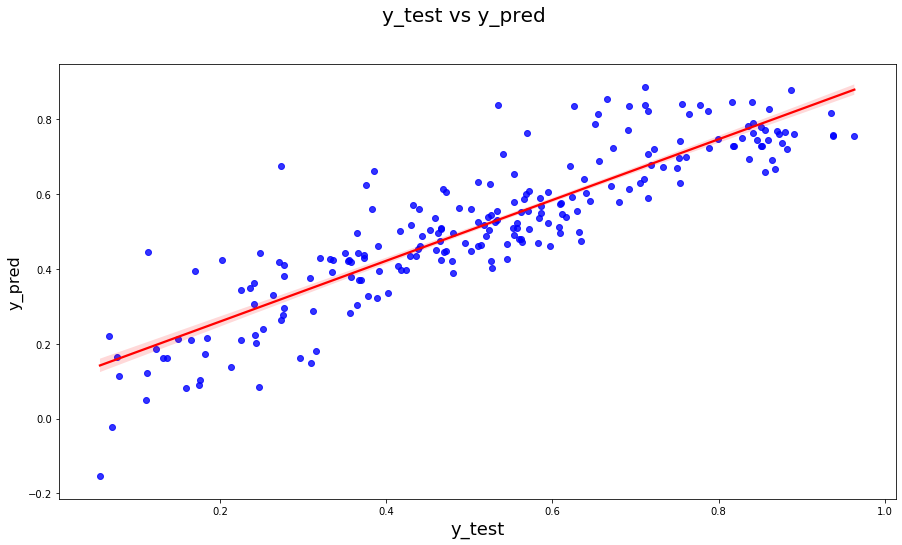

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(15,8))
#plt.scatter(y_test, y_pred, alpha=.5)
sns.regplot(x=y_test,y=y_pred,ci=68,fit_reg = True,scatter_kws = {"color":"blue"},line_kws ={"color":"red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R-Squared value for Testing

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
r2 = 0.7790982771440179

r2 = 0.7790982771440179

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

## Final Comparisions
Train R^2 :0.795<br>
Train Adjusted R^2 :0.792<br>
Test R^2 :0.779<br>
Test Adjusted R^2 :0.771<br>
This seems to be a  good model that can very well 'Generalize' various datasets.

## Conclusion
As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5766’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5766 units.<br>
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2753’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2753 units.<br>
Year (yr) - A coefficient value of ‘0.2329’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2329 units.<br>
mnth_9- During September Month the demand of bike will be very high